In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt

from training.util import sgd, plot_losses, adam, lr_scheduler, wilson_scheduler, scheduler_factory

/home/flo/anaconda3/envs/bdl2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda")

In [3]:
import experiments.base.cifar as cifar

batch_size = 128
trainloader = cifar.cifar10_trainloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size, subsample=5000)
testloader = cifar.cifar10_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size)
#stl_testloader = cifar.stl10_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=128)

In [7]:
import experiments.base.cifar as cifar
corrupted_testloader = cifar.cifar10_corrupted_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", intensity=4, batch_size=128)

: 

: 

In [4]:
from training.pp import MAP
from training.swag import SwagModel

layers = [
    ("preresnet-20", (32, 3, 10)),
    ("logsoftmax", ())
]

config = {
    "deviation_samples": 30,
    "mean_samples": 100,
    "start_epoch": 161
}

model = MAP(layers)

model.train_model(30, torch.nn.NLLLoss(), sgd(1e-1, weight_decay=3e-4, momentum=0.9, nesterov=True), trainloader, batch_size, device, scheduler_factory=wilson_scheduler(161, 0.1, None))
#model.load_state_dict(torch.load("/mnt/d/Uni/Bachelorarbeit/results/CIFAR10/2/results/MAP/log/rep_00model.tar"))
model.to(device)

Epoch 0: loss 2.01584792137146
Epoch 1: loss 1.7863575220108032
Epoch 2: loss 1.6391899585723877
Epoch 3: loss 1.5623986721038818
Epoch 4: loss 1.491809368133545
Epoch 5: loss 1.3847906589508057
Epoch 6: loss 1.335707426071167
Epoch 7: loss 1.2436728477478027
Epoch 8: loss 1.1986472606658936
Epoch 9: loss 1.2174004316329956
Epoch 10: loss 1.1391068696975708
Epoch 11: loss 1.0604826211929321
Epoch 12: loss 1.0955108404159546
Epoch 13: loss 1.040108323097229
Epoch 14: loss 0.9668388366699219
Epoch 15: loss 0.9387396574020386
Epoch 16: loss 0.8718662261962891
Epoch 17: loss 0.86735999584198
Epoch 18: loss 1.076339840888977
Epoch 19: loss 0.9016361236572266
Epoch 20: loss 0.8792597055435181
Epoch 21: loss 0.931921660900116
Epoch 22: loss 0.8573635220527649
Epoch 23: loss 0.8128498792648315
Epoch 24: loss 0.7687486410140991
Epoch 25: loss 0.7544850707054138
Epoch 26: loss 0.7607107162475586
Epoch 27: loss 0.8008245229721069
Epoch 28: loss 0.82341468334198
Epoch 29: loss 0.7128819227218628
F

MAP(
  (model): Sequential(
    (0): PreResNet(
      (model): Sequential(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): PreBasicBlock(
          (main_path): Sequential(
            (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
            (1): ReLU()
            (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
            (4): ReLU()
            (5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          )
          (skip_path): Identity()
        )
        (2): PreBasicBlock(
          (main_path): Sequential(
            (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
            (1): ReLU()
            (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (3

In [5]:
import experiments.base.multiclass_classification as exp

exp.eval_model(model, 5, testloader, device)

 Accuracy: 0.5697000026702881
 Avg Log Likelihood: -1.3590730428695679
 Avg Likelihood: 0.5061303973197937
 ECE: 0.14759075942486524


(tensor(0.5697),
 tensor(-1.3591),
 tensor(0.5061),
 <training.calibration.ClassificationCalibrationResults at 0x7fd4b9326f70>)

In [14]:
from training.bbb import BBBModel, GaussianPrior

prior = GaussianPrior(torch.tensor(0), torch.tensor(1))
layers = [
    ("variational-preresnet-20", (32, 3, 10, prior)),
    ("logsoftmax", ())
]

model = BBBModel(layers)

model.train_model(30, torch.nn.NLLLoss(), sgd(1e-1, momentum=0.9, nesterov=True), trainloader, batch_size, device, scheduler_factory=scheduler_factory(wilson_scheduler(300, 1e-1, None)), mc_samples=2, kl_rescaling=0.5)

Epoch 0: loss 0.016812792047858238
Epoch 1: loss 0.01514538936316967
Epoch 2: loss 0.014576606452465057
Epoch 3: loss 0.013781750574707985
Epoch 4: loss 0.013224685564637184
Epoch 5: loss 0.012892571277916431
Epoch 6: loss 0.012442981824278831
Epoch 7: loss 0.012070635333657265
Epoch 8: loss 0.011789536103606224
Epoch 9: loss 0.011786548420786858
Epoch 10: loss 0.011420974507927895
Epoch 11: loss 0.011331411078572273
Epoch 12: loss 0.010765699669718742
Epoch 13: loss 0.010381096974015236
Epoch 14: loss 0.009998918510973454
Epoch 15: loss 0.009953840635716915
Epoch 16: loss 0.00974450446665287
Epoch 17: loss 0.009362411685287952
Epoch 18: loss 0.009200184606015682
Epoch 19: loss 0.009995797649025917
Epoch 20: loss 0.008917008526623249
Epoch 21: loss 0.008530959486961365
Epoch 22: loss 0.008324888534843922
Epoch 23: loss 0.008079549297690392
Epoch 24: loss 0.008152643218636513
Epoch 25: loss 0.007774443365633488
Epoch 26: loss 0.0075240121223032475
Epoch 27: loss 0.008525660261511803
Epo

In [15]:
import experiments.base.multiclass_classification as exp

model.to(device)
exp.eval_model(model, 5, testloader, device)

 Accuracy: 0.560699999332428
 Avg Log Likelihood: -1.2729154825210571
 Avg Likelihood: 0.4686032831668854
 ECE: 0.07069729184508323


(tensor(0.5607),
 tensor(-1.2729),
 tensor(0.4686),
 <training.calibration.ClassificationCalibrationResults at 0x7f3961af7df0>)

In [6]:
import experiments.base.multiclass_classification as exp

exp.eval_model(model, 5, testloader, device)

 Accuracy: 0.6556000113487244
 Avg Log Likelihood: -1.1313354969024658
 Avg Likelihood: 0.5835703611373901
 ECE: 0.08731313892900944


(tensor(0.6556),
 tensor(-1.1313),
 tensor(0.5836),
 <training.calibration.ClassificationCalibrationResults at 0x7f272b4afb20>)

In [17]:
from training.pp import MAP
from training.vogn import iVONModuleFunctorch, VOGNModule

layers = [
    ("preresnet-20", (32, 3, 10)),
    ("logsoftmax", ())
]

ivon_model = VOGNModule(layers)
ivon_model.train_model(100, torch.nn.NLLLoss(), {"lr": 1e-1, "prior_prec": 10, "betas": (0.9, 0.999), "damping": 1e-3, "augmentation": 5, "sample": True}, trainloader, batch_size, device, scheduler=wilson_scheduler(30, 1e-1, None), mc_samples=2)

Epoch 0: loss 2.332385301589966
Epoch 1: loss 2.253911018371582
Epoch 2: loss 2.23465633392334
Epoch 3: loss 2.199200391769409
Epoch 4: loss 2.16426420211792
Epoch 5: loss 2.1393144130706787
Epoch 6: loss 2.109506607055664
Epoch 7: loss 2.104416608810425
Epoch 8: loss 2.154355764389038
Epoch 9: loss 2.1372323036193848
Epoch 10: loss 2.1697168350219727
Epoch 11: loss 2.0948901176452637
Epoch 12: loss 2.129309892654419
Epoch 13: loss 2.2152178287506104
Epoch 14: loss 2.13733172416687
Epoch 15: loss 2.1065380573272705
Epoch 16: loss 2.163856267929077
Epoch 17: loss 2.1148147583007812
Epoch 18: loss 2.119962215423584
Epoch 19: loss 2.0573549270629883
Epoch 20: loss 2.0007452964782715
Epoch 21: loss 1.9806022644042969
Epoch 22: loss 1.9649388790130615
Epoch 23: loss 1.9530519247055054
Epoch 24: loss 1.9255977869033813
Epoch 25: loss 1.9343814849853516
Epoch 26: loss 1.9311554431915283
Epoch 27: loss 1.9267498254776
Epoch 28: loss 1.946887731552124
Epoch 29: loss 1.9310731887817383
Epoch 30:

In [18]:
import experiments.base.multiclass_classification as exp

exp.eval_model(ivon_model, 5, testloader, device)

 Accuracy: 0.08919999748468399
 Avg Log Likelihood: -3.8762266635894775
 Avg Likelihood: 0.08848392218351364
 ECE: 0.2536653894111514


(tensor(0.0892),
 tensor(-3.8762),
 tensor(0.0885),
 <training.calibration.ClassificationCalibrationResults at 0x7f4d90788bb0>)

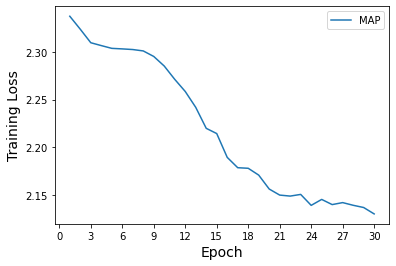

In [11]:
plot_losses("MAP", ivon_model.all_losses(), plt.subplot())